# 6.2 Exploring relationships in Global Real Estate Transactions

### Content:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships

         Correlations
         Scatterplots
         Pair Plots
         Categorical Plots

## 01. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# folder path to main project folder
path = r'C:\Users\ThinkPad T570\Documents\05-2024 OpenData WorldRealEstate Analysis_LazerHF'

In [5]:
# importing prepared World Real Estate dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_selected.csv'))

In [6]:
df.head()

,Unnamed: 0,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_total_area,price_in_USD,Continent
0,1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021,2.0,NaN,NaN,500.0,1108667.0,Europe
1,4,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007,2.0,3.0,5.0,245.0,274415.0,Europe
2,10,"Cottage 555 m² in Haranski sielski Saviet, Bel...",Belarus,"Minsk Region, Haranski sielski Saviet, Minsk D...",2017,3.0,NaN,NaN,555.0,295000.0,Europe
3,11,"1 room studio apartment 38 m² in UAE, UAE",UAE,UAE,2024,6.0,NaN,1.0,38.0,97930.0,Africa
4,12,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",2023,4.0,2.0,4.0,54.0,314990.0,Europe


In [7]:
df.shape

(46722, 11)

In [8]:
df.dtypes

Unnamed: 0                      int64
title                          object
country                        object
location                       object
building_construction_year      int64
building_total_floors         float64
apartment_floor               float64
apartment_rooms               float64
apartment_total_area          float64
price_in_USD                  float64
Continent                      object
dtype: object

In [9]:
df['building_total_floors'] = df['building_total_floors'].astype('Int64')

In [12]:
df['apartment_floor'] = df['apartment_floor'].astype('Int64')

In [13]:
df['apartment_rooms'] = df['apartment_rooms'].astype('Int64')

In [10]:
df['apartment_total_area'] = df['apartment_total_area'].astype('Int64')

In [14]:
df.dtypes

Unnamed: 0                      int64
title                          object
country                        object
location                       object
building_construction_year      int64
building_total_floors           Int64
apartment_floor                 Int64
apartment_rooms                 Int64
apartment_total_area            Int64
price_in_USD                  float64
Continent                      object
dtype: object

## 02. Data Cleaning

In [15]:
df.columns

Index(['Unnamed: 0', 'title', 'country', 'location',
       'building_construction_year', 'building_total_floors',
       'apartment_floor', 'apartment_rooms', 'apartment_total_area',
       'price_in_USD', 'Continent'],
      dtype='object')

In [16]:
# drop column
df = df.drop(['Unnamed: 0'], axis=1)

In [17]:
# Rename columns 

df.rename(columns = {'title': 'Title', 'country': 'Country', 'location': 'Location', 'building_construction_year': 'Year', 
                     'building_total_floors': 'Total_Floors', 'apartment_floor': 'Apart_Floors', 
                     'apartment_rooms': 'Apart_Rooms', 'apartment_total_area': 'Total_Area',
                     'price_in_USD': 'Price'},
                     inplace = True)

In [18]:
df.head()

,Title,Country,Location,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,Continent
0,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021,2,<NA>,<NA>,500,1108667.0,Europe
1,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007,2,3,5,245,274415.0,Europe
2,"Cottage 555 m² in Haranski sielski Saviet, Bel...",Belarus,"Minsk Region, Haranski sielski Saviet, Minsk D...",2017,3,<NA>,<NA>,555,295000.0,Europe
3,"1 room studio apartment 38 m² in UAE, UAE",UAE,UAE,2024,6,<NA>,1,38,97930.0,Africa
4,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",2023,4,2,4,54,314990.0,Europe


In [19]:
# Check for missing values
df.isnull().sum()

Title               0
Country             0
Location            0
Year                0
Total_Floors    17644
Apart_Floors    25903
Apart_Rooms     20681
Total_Area          0
Price               0
Continent           0
dtype: int64

In [20]:
# dropping missing values in specific columns
df.dropna(subset = ['Total_Floors', 'Apart_Floors', 'Apart_Rooms'], inplace = True)

In [21]:
# Check for missing values
df.isnull().sum()

Title           0
Country         0
Location        0
Year            0
Total_Floors    0
Apart_Floors    0
Apart_Rooms     0
Total_Area      0
Price           0
Continent       0
dtype: int64

In [22]:
# Find duplicates
df_dups = df[df.duplicated()]

In [23]:
df_dups.shape # no duplicates

(0, 10)

In [25]:
# Mixed Typed-Data
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_10508\2487897006.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_10508\2487897006.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_10508\2487897006.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_10508\2487897006.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\ThinkPad T570\AppData\Local

### Creating Continent Code

In [26]:
df.loc[df['Continent'] == 'Africa', 'C-Code'] = 1
df.loc[df['Continent'] == 'Americas', 'C-Code'] = 2
df.loc[df['Continent'] == 'Asia', 'C-Code'] = 3
df.loc[df['Continent'] == 'Australia', 'C-Code'] = 4
df.loc[df['Continent'] == 'Europe', 'C-Code'] = 5
df.loc[df['Continent'] == 'Others', 'C-Code'] = 0

In [75]:
df['Continent'].value_counts(dropna = False)

Continent
Europe    12607
Asia       3093
Africa       94
Name: count, dtype: int64

In [27]:
df['C-Code'] = df['C-Code'].astype('Int64')

In [28]:
df.dtypes

Title            object
Country          object
Location         object
Year              int64
Total_Floors      Int64
Apart_Floors      Int64
Apart_Rooms       Int64
Total_Area        Int64
Price           float64
Continent        object
C-Code            Int64
dtype: object

## 03. Exploring Relationships

### Correlations

In [29]:
# remove columns not applicable for correlation
df_numeric = df.drop(['Title', 'Country', 'Location', 'Continent'], axis=1)

In [30]:
# Create a correlation matrix using pandas
df_numeric.corr()

,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,C-Code
Year,1.000000,0.462565,0.329969,-0.035959,0.012073,0.142398,-0.312995
Total_Floors,0.462565,1.000000,0.705635,-0.125500,-0.011101,-0.067575,-0.337805
Apart_Floors,0.329969,0.705635,1.000000,-0.086782,-0.008314,0.005826,-0.330769
Apart_Rooms,-0.035959,-0.125500,-0.086782,1.000000,0.034467,0.366429,0.182890
Total_Area,0.012073,-0.011101,-0.008314,0.034467,1.000000,0.028326,0.004316
Price,0.142398,-0.067575,0.005826,0.366429,0.028326,1.000000,-0.044726
C-Code,-0.312995,-0.337805,-0.330769,0.182890,0.004316,-0.044726,1.000000


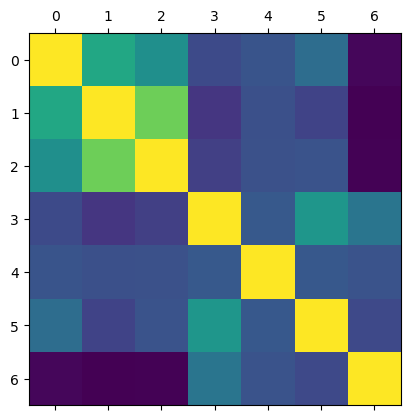

In [31]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_numeric.corr())
plt.show()

In [32]:
# Save figure
plt.matshow(df.corr())
plt.savefig(os.path.join(path, '02 Analysis','Visualizations', 'corr_no_labels.png'))

ValueError: could not convert string to float: '4 room apartment 245 m² in Yesiloez, Turkey'

Text(0.5, 1.0, 'Correlation Matrix')

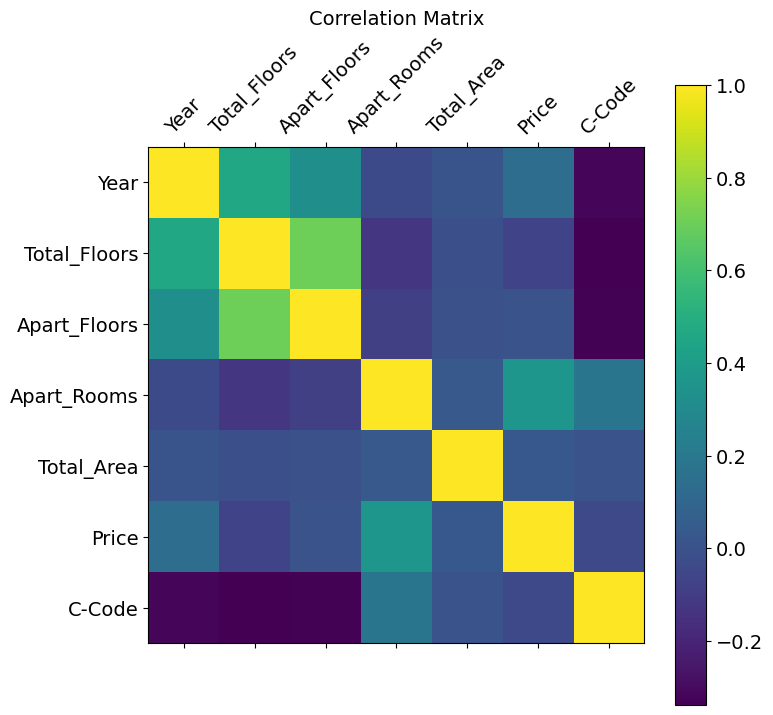

In [33]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Create a Correlation Heatmap Using Seaborn

In [34]:
df_numeric.columns

Index(['Year', 'Total_Floors', 'Apart_Floors', 'Apart_Rooms', 'Total_Area',
       'Price', 'C-Code'],
      dtype='object')

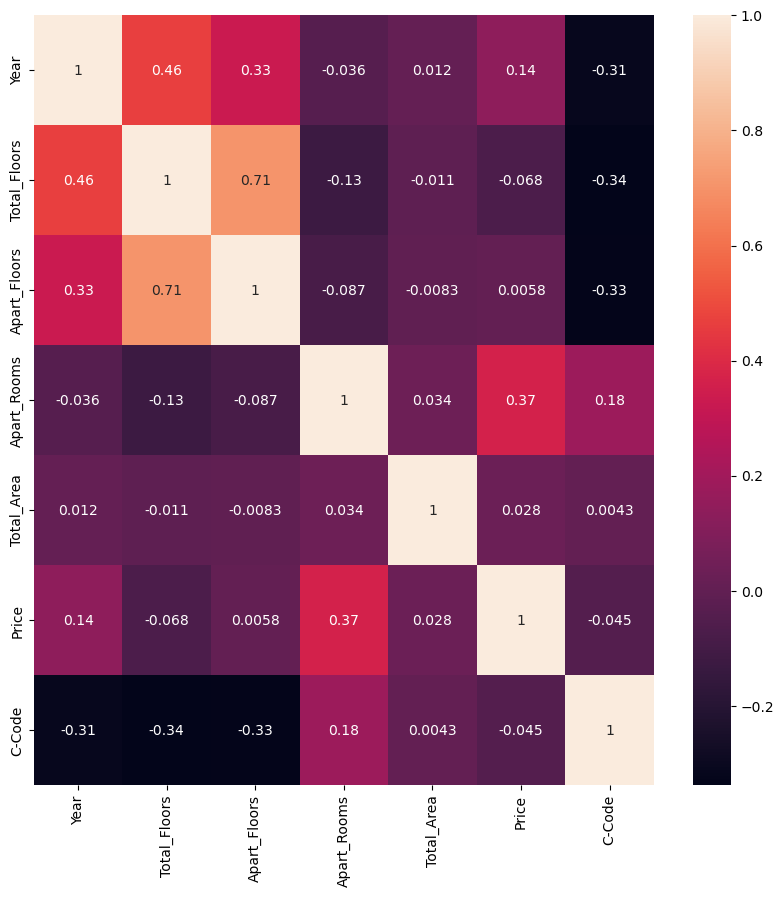

In [35]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Question 3:

Discuss what the coefficients in the plot mean in terms of the relationships between the variables:

The correlation heatmap of our real estate transaction dataset offers some intriguing insights. As expected, there is a strong correlation between the number of apartment floors and the total floors in a building. A medium correlation exists between the building construction year and the number of total floors, indicating that newer buildings tend to be taller. This relationship extends, albeit to a lesser degree, to the number of apartment floors.

Interestingly, we also observe a correlation between the price and the number of apartment rooms, suggesting that apartments with more rooms tend to be more expensive. There is a weaker correlation between the price and the building construction year, indicating that newer buildings might command higher prices.

In terms of geographical location, a slight correlation exists between the number of apartment rooms and the continent. This suggests that the average number of rooms per apartment might vary depending on the location. 

### Scatterplots

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


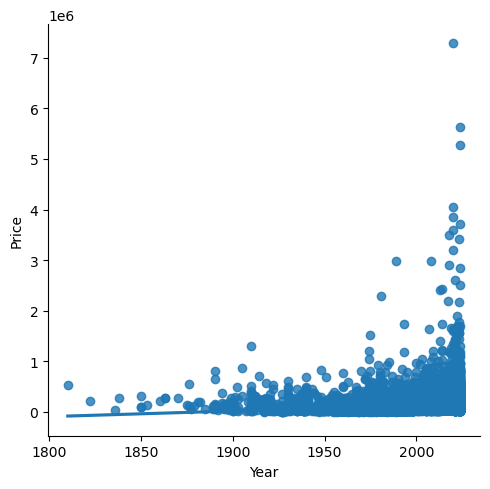

In [39]:
# Create a scatterplot for the "Building Construction Year" and "Price" columns in seaborn
sns.lmplot(x = 'Year', y = 'Price', data = df_numeric)

#### Question 4:

Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships:


Our scatterplot correlating Building Construction Year and Price offers additional insights. The data range extends from 1800 to 2024, and it is evident that newer buildings tend to command higher prices in real estate transactions. This trend is expected given the appeal of modern amenities and architectural designs.

However, there are interesting outliers where older buildings sell at a higher price. This could be attributed to factors such as historical significance, rarity, or architectural uniqueness.

Most strikingly, real estate transactions involving very recent construction projects show a significant price surge. This could be due to several factors such as increased construction costs, demand for energy-efficient homes, or a shift towards luxury housing. This warrants further investigation to better understand the underlying causes.

#### Pair Plots

In [40]:
# with variables applicable to the pair plot
sub = df_numeric[['Year', 'Total_Floors', 'Apart_Floors', 'Apart_Rooms', 'Total_Area', 'Price', 'C-Code']]

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

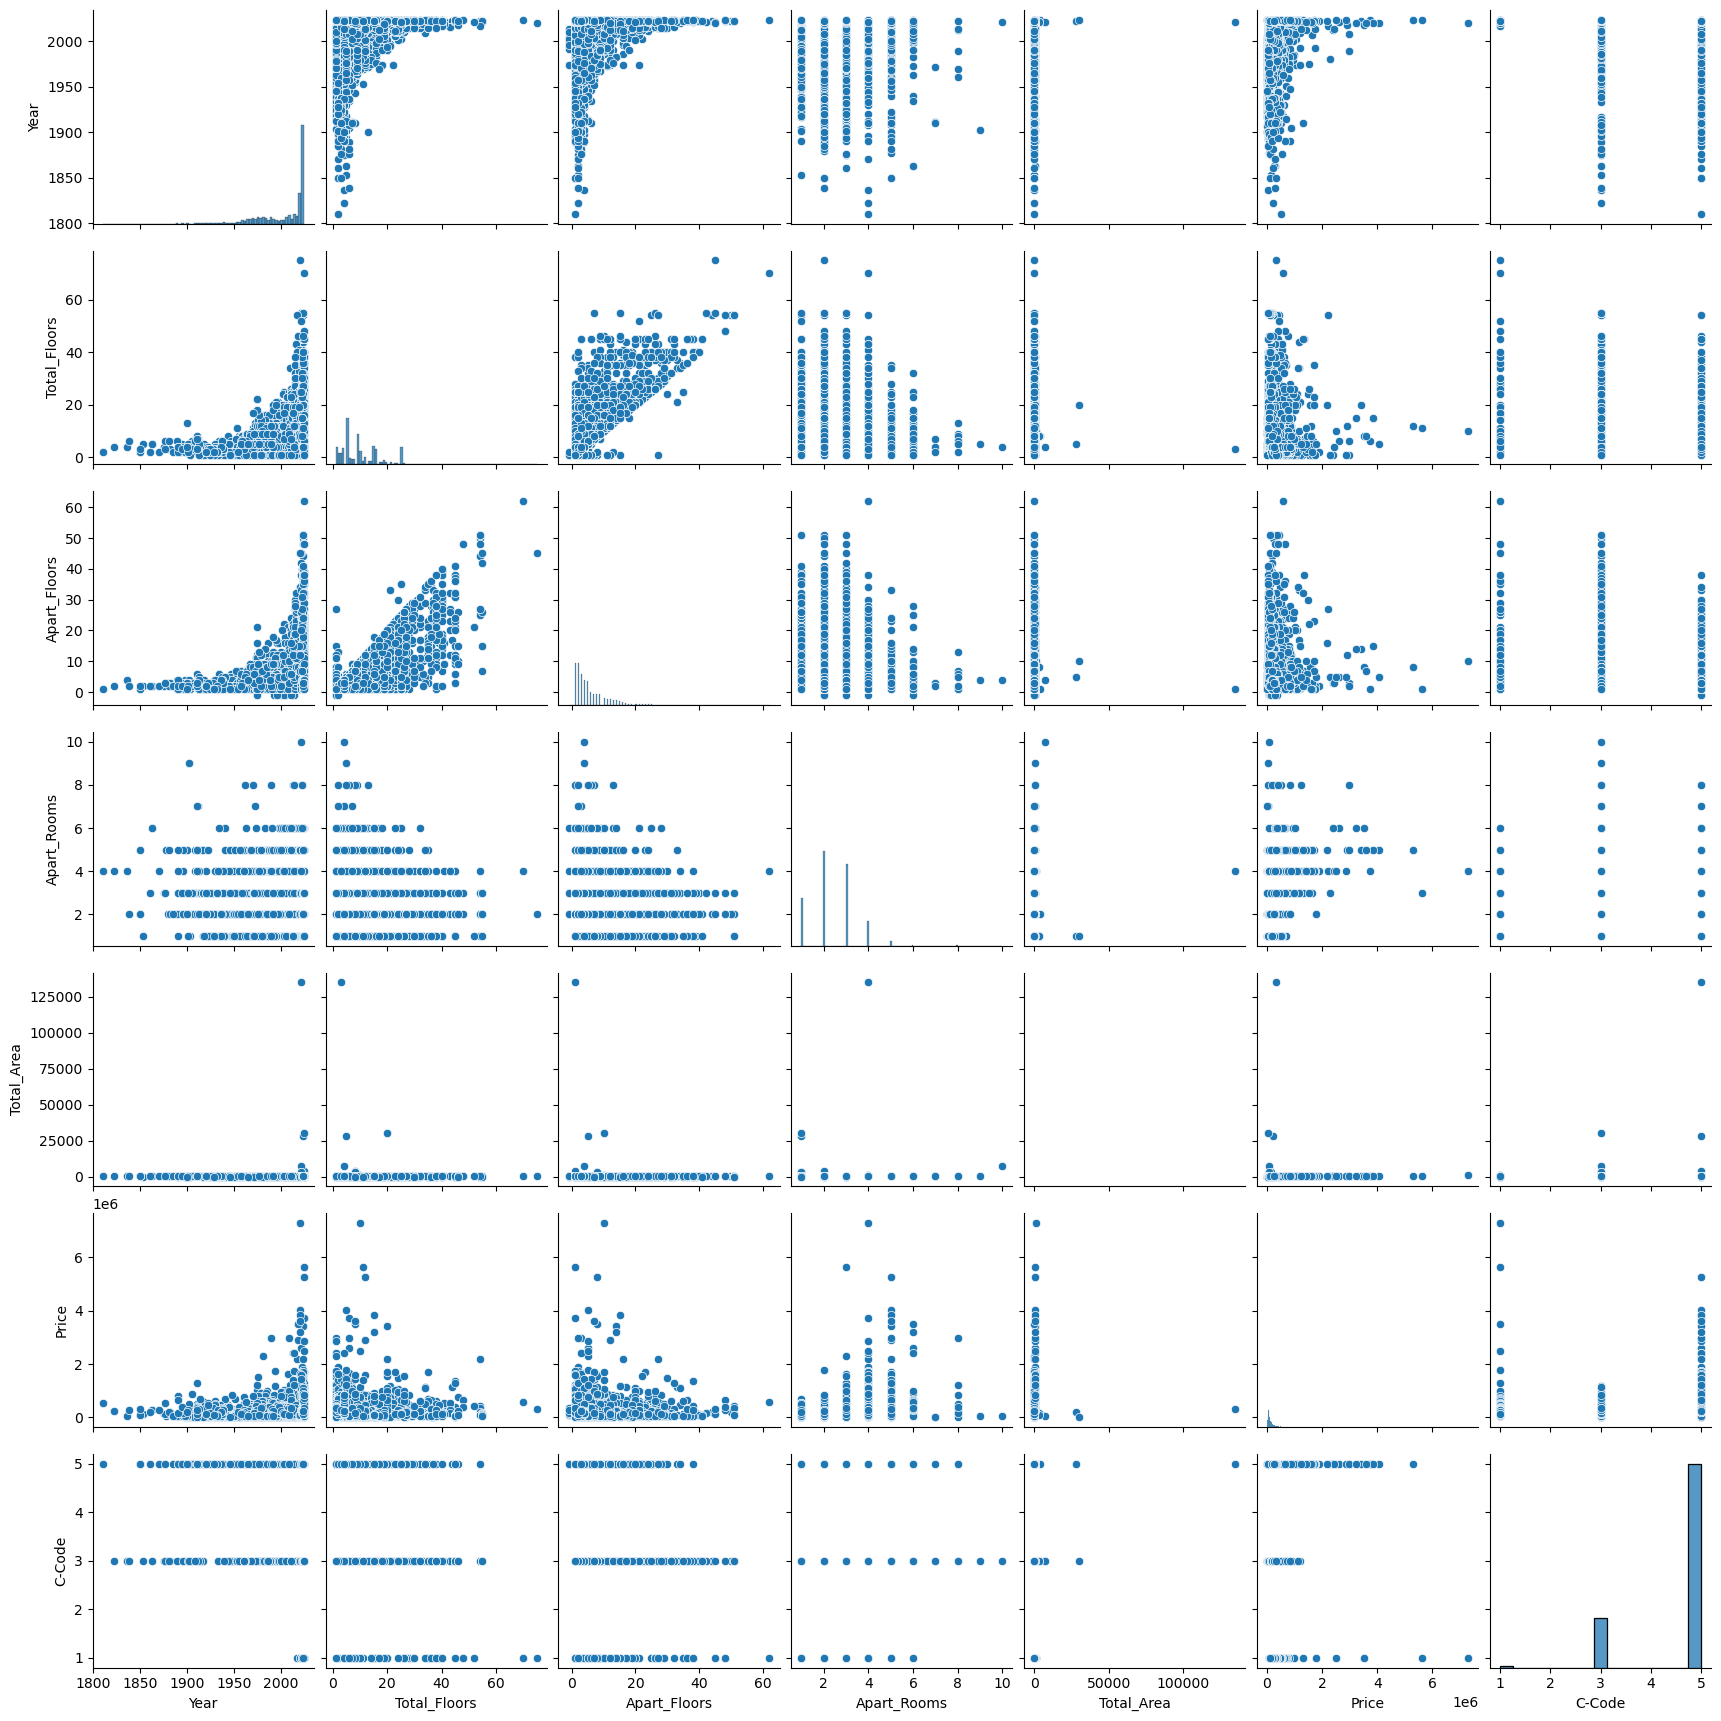

In [41]:
# Create a pair plot 
g = sns.pairplot(sub)

#### Question 5:

Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

Pair plots and heatmap analysis show strong correlation between the number of apartment floors and total floors, indicating larger buildings typically have more floors. Newer buildings are generally taller, evident from the medium correlation between building construction year and total floors. Price is correlated with the number of apartment rooms, suggesting more rooms command higher prices. A weaker correlation exists between price and building construction year, implying newer buildings may be priced higher. Geographical location may affect the number of apartment rooms. Essentially, pair plots mirror the heatmap findings, providing no significant new insights, but reinforcing our understanding of real estate variables.

I would be interested in exploring the geographical component in more detail, specifically as the visualization didn't offer too many insights on that variable. According to the research questions formulated in the beginning of the project there are still more insights to be gathered in the dataset:

1. How does the price of property vary across different countries?
5. What is the trend of property prices over time in different countries?
7. Are there differences in the size of apartments (both total and living area) across different countries?
11. Are there certain countries where the real estate market is predominantly made up of larger (more rooms, larger area) properties?
13. Based on the future construction dates provided in the dataset, what are the upcoming developments in global real estate based on size, price and location?

### Categorical Plots

#### Creating a categorical variable that splits the "Price" column into categories¶

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

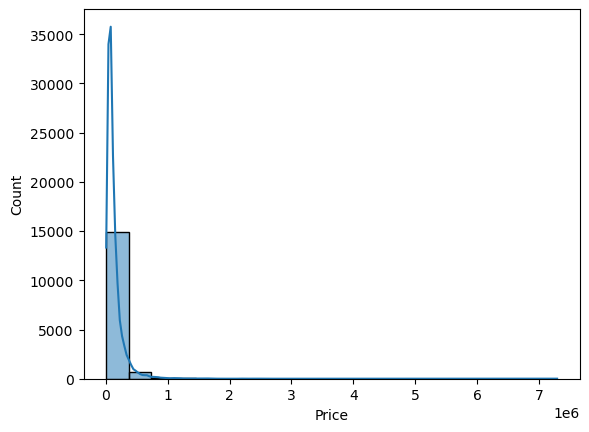

In [47]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" adds a line that encompasses the distribution

sns.histplot(df_numeric['Price'], bins = 20, kde = True)

In [50]:
# Check how many extreme values

df_numeric[df_numeric['Price'] >1000000]

,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,C-Code
1565,2022,2,2,4,170,1902124.0,5
1571,2018,4,4,4,128,1190186.0,5
1574,2023,18,10,5,183,1005409.0,5
1602,2020,12,8,5,278,1600000.0,5
1610,2021,6,5,6,444,2603193.0,5
...,...,...,...,...,...,...,...
45117,2021,5,4,4,187,1423279.0,5
45125,2021,7,7,4,185,1099817.0,5
45145,2023,6,4,4,220,1092776.0,5
45267,2023,20,16,5,267,2174987.0,5


In [53]:
df_price_sub = df_numeric[df_numeric['Price'] < 1000000]

In [54]:
df_price_sub.shape

(15712, 7)

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

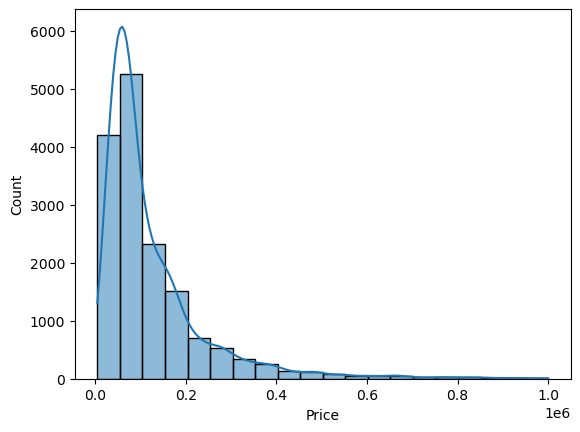

In [55]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" adds a line that encompasses the distribution

sns.histplot(df_price_sub['Price'], bins = 20, kde = True)

#### Creating House Price Categories

In [58]:
df.loc[df['Price'] < 100000, 'Price_category'] = 'Low price'

In [59]:
df.loc[(df['Price'] >= 100000) & (df['Price'] < 500000), 'Price_category'] = 'Middle price'

In [64]:
df.loc[df['Price'] >= 500000, 'Price_category'] = 'High price'

In [65]:
df['Price_category'].value_counts(dropna = False)

Price_category
Low price       9265
Middle price    6110
High price       419
Name: count, dtype: int64

#### Creating Time Periods

In [68]:
df.loc[(df['Year'] >= 1800) & (df['Year'] < 1900), 'Time_Period'] = '1800-1900'

In [69]:
df.loc[(df['Year'] >= 1900) & (df['Year'] < 2000), 'Time_Period'] = '1900-2000'

In [70]:
df.loc[(df['Year'] >= 2000), 'Time_Period'] = '2000s'

In [73]:
df['Time_Period'].value_counts(dropna = False)

Time_Period
2000s        10676
1900-2000     5078
1800-1900       40
Name: count, dtype: int64

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


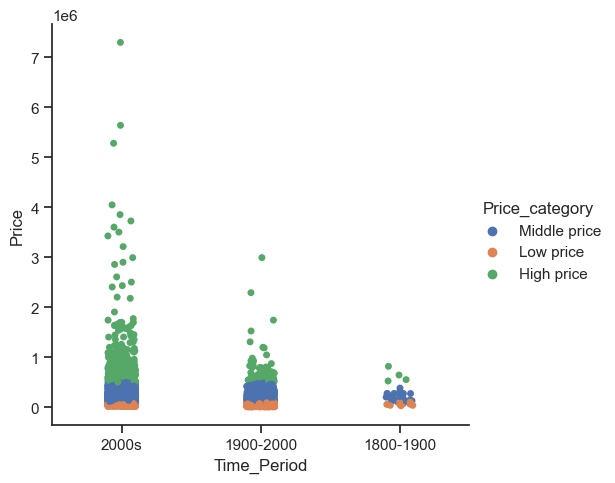

In [71]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Time_Period", y="Price", hue="Price_category", data=df)

#### Question 6

Create a categorical plot and interpret the results.

I set up categories for both variables, Real Estate Price and Time Period. The categorial plot displays a clearer distribution of real estate transaction amounts seperated by time periods. An additional segmentation of the time periods can offer better insights on the development of real estate transactions over time. 

#### Question 7

Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

The exploration of the real estate dataset has provided some preliminary answers to the questions generated. I found that property prices do vary across different countries, likely influenced by factors such as local economies, demand, and real estate market conditions, in very general terms. The total area of an apartment seems to have a direct (but not that strong) relationship with its price, with larger apartments generally commanding higher prices.

There is indeed a correlation between the year of construction and price, with newer buildings often priced higher. This may be due to modern amenities, architectural designs, or increased construction costs. The number of rooms in an apartment also affects its price, with more rooms typically leading to higher prices.

Trends of property prices over time differ between countries, reflecting local market conditions. Differences in apartment sizes were observed in the exploration of the dataset across different countries, potentially reflecting cultural preferences or typical living conditions.

The relationship between the number of bedrooms and bathrooms in an apartment and its price was also confirmed, with more bathrooms and bedrooms generally leading to higher prices. The sizes of apartments show changes over time, potentially influenced by changing living standards or construction practices. The number of floors in a building does influence the price of apartments within it, likely due to factors such as views and the availability of amenities.

Certain countries have a real estate market predominantly made up of larger properties. The age of a building does relate to the size of the apartments within it, with newer buildings often having larger apartments. Based on future construction dates, it appears that there are ongoing developments in global real estate, with trends towards larger, pricier properties in certain locations. (this needs further exploration)

These findings provide a broad overview of the factors influencing real estate prices and characteristics on a global scale. Further analysis would help refine these observations and uncover more nuanced insights.

#### Exporting

In [72]:
# fig = g.get_figure()
g.savefig(os.path.join(path, '02 Analysis','Visualizations', 'categorial_plot_Price_Year.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ThinkPad T570\\Documents\\05-2024 OpenData WorldRealEstate Analysis_LazerHF\\02 Analysis\\Visualizations\\categorial_plot_Price_Year.png'